## SPATIAL model for ADCP data

In [1]:
import pandas as pd
import numpy as np
from model import py_ty_plot, SP_Learner

#### Data Collection
##### sensor 1: E39_A_Sulafjorden-currSp.csv
##### sensor 2: E39_B_Sulafjorden-currSp.csv
##### sensor 3: E39_D_Breisundet-currSp.csv
##### sensor 4: E39_F_Vartdalsfjorden-currSp.csv

In [2]:
Out = "C:/Users/yihao/Dropbox/Research/Deep_Learning/30min_Data/"
adcp = []
for i in range(1,5):
    df = pd.read_csv(Out+'ADCP_Sensor_'+str(i)+'.csv',index_col="Date", parse_dates=True)
    df[np.isnan(df)]=-1 # mask the missing values
    adcp.append(df.Value.to_list())
    print(df.index.min(),df.index.max()) # Check timestamp

2019-01-01 00:00:00 2019-12-31 23:30:00
2019-01-01 00:00:00 2019-12-31 23:30:00
2019-01-01 00:00:00 2019-12-31 23:30:00
2019-01-01 00:00:00 2019-12-31 23:30:00


### SP_Learner(data, train_time, predict_time, predict_position,Stride, start, end, data_name):
##### data: The original Input data, with missing value masked as -1
##### training time: the training data length, if 6, means use 6/2 = 3 hours to train (30 min data)
##### predict_time: predicted data length
##### predict_position: the stride between training data and predicted data.
For example, if use the previous 3 hours to predict the next 24 hours data (value at 3$\times$2+24$\times$2),
the predict_position will be 24$\times$2-1, and predict_time will be 1 (single point)
##### p1, p2 choose the portion for testing, for example p1 = .8, p2= 1 picks the last 20%
##### Stride: the data split stride
Here we uses the masked data for learning and original interpolated data for predicting

########################Start##################################
Training Data Length:  4 X 14016
Test Data Length:  4 X 3504
Testing percentage:  20.0 %
Total data size:  4 X 17520
Train data size(batch, row, column) Train X:  (2793, 4, 6)  ,Train Y:  (2793, 4, 1)
test data size(batch, row, column) Test X:  (691, 4, 6)  ,Test Y:  (691, 4, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 4, 6)              0         
_________________________________________________________________
bidirectional (Bidirectional (None, 4, 64)             9984      
_________________________________________________________________
dense (Dense)                (None, 4, 1)              65        
Total params: 10,049
Trainable params: 10,049
Non-trainable params: 0
_________________________________________________________________
Total compile time: -------- 43.901570

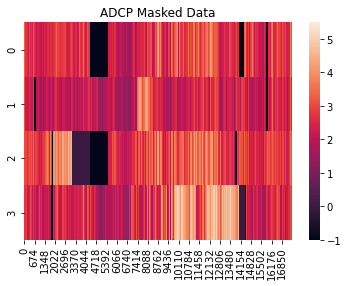

<Figure size 432x288 with 0 Axes>

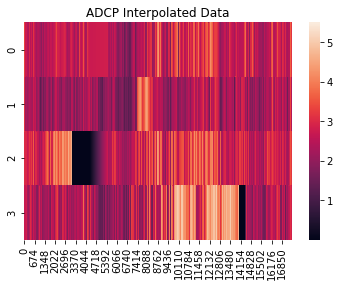

<Figure size 432x288 with 0 Axes>

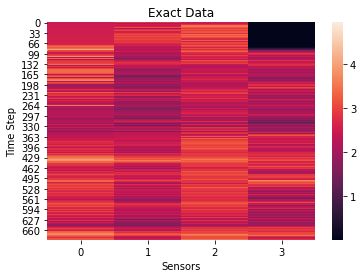

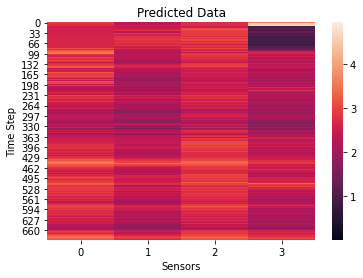

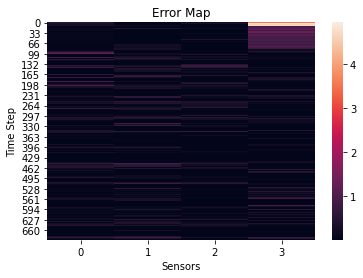

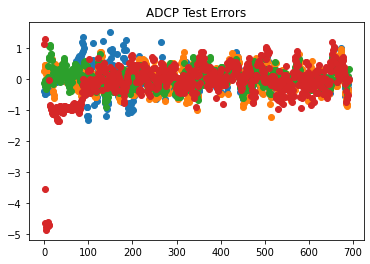

In [3]:
p1, p2 = .8, 1
train_hour = 3
predict_hour = 1
predict_position = 24
adcp_py, adcp_ty, adcp_error,adcp_sd, adcp_model = SP_Learner(adcp,train_hour*2 ,predict_hour,predict_position*2-1,5,p1,p2,'ADCP')

In [4]:
# Sensor MAEs and STDs:
for i in range(len(adcp)):
    print('MAE for sensor'+str(i+1)+' ', adcp_error[i], ' STD: ', adcp_sd[i])
print('Total MAE', np.mean(adcp_error), 'Total STD: ', np.mean(adcp_sd))

MAE for sensor1  5.048599515365082  STD:  6.270489198495511
MAE for sensor2  3.1255208860679193  STD:  2.738818388990745
MAE for sensor3  3.599583873771113  STD:  3.4769518670367545
MAE for sensor4  4.8140203149833605  STD:  13.476717749541738
Total MAE 4.146931147546868 Total STD:  6.490744301016187


#### Check the predicted data and exact data

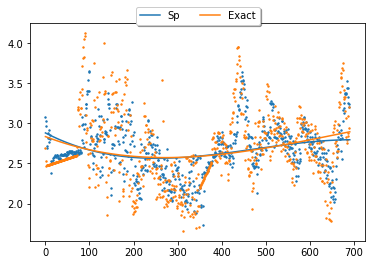

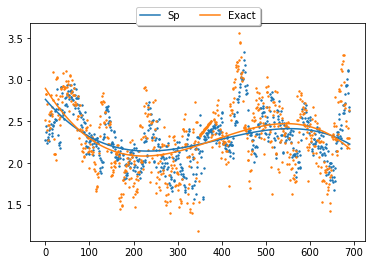

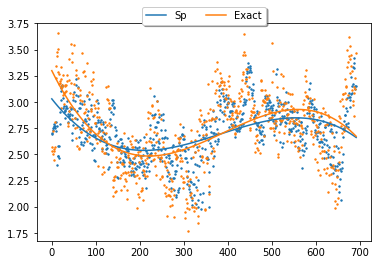

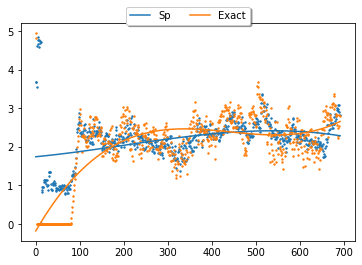

In [5]:
for i in range(len(adcp)):
    py_ty_plot(adcp_py, adcp_ty,2,100, 'ADCP_sensor_plot',i)